In [23]:
import sys
sys.path.append("../../")

In [24]:
from crawl.ssi.stock_market_data_ssi import get_stock_market_data
from datetime import datetime
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
from ta import add_all_ta_features
from ta.utils import dropna
import ta
import ta.momentum

In [25]:
fpt_data_df = get_stock_market_data(
    stock_symbol="FPT",
    resolution="1D"
)

In [26]:
fpt_data_df_1 = fpt_data_df[['t', 'c', 'o', 'h', 'l', 'v']]
fpt_data_df_1["Date"] = pd.to_datetime(fpt_data_df_1["t"], unit="s")
fpt_data_df_1.rename(columns={
    "o": "Open",
    "h": "High",
    "l": "Low",
    "c": "Close",
    "v": "Volume"
}, inplace=True)
fpt_data_df_1.set_index("Date", inplace=True)
fpt_data_df_1.drop(columns=["t"], inplace=True)

In [27]:
# Thêm chỉ số MACD vào DataFrame
fpt_data_df_1["M"] = ta.trend.macd(fpt_data_df_1["Close"])
fpt_data_df_1["macd_signal"] = ta.trend.macd_signal(fpt_data_df_1["Close"])
fpt_data_df_1["macd_histogram"] = ta.trend.macd_diff(fpt_data_df_1["Close"])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_25976\2585870074.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


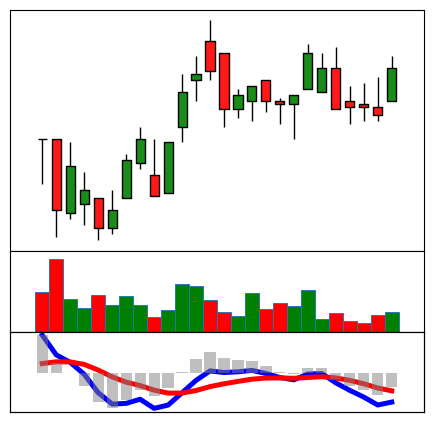

In [36]:
# Thiết lập màu sắc cho nến tăng và nến giảm
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='inherit')
style = mpf.make_mpf_style(marketcolors=mc)

adps = [
    mpf.make_addplot(fpt_data_df_1["2024-09-01":"2024-10-09"]["macd"], panel=2, color="blue", ylabel="MACD"),
    mpf.make_addplot(fpt_data_df_1["2024-09-01":"2024-10-09"]["macd_signal"], panel=2, color="red"),
    mpf.make_addplot(fpt_data_df_1["2024-09-01":"2024-10-09"]["macd_histogram"], type="bar", panel=2, color="gray", alpha=0.5),
]

# Vẽ biểu đồ nến với khối lượng và ẩn các trục
fig, axlist = mpf.plot(
    fpt_data_df_1["2024-09-01":"2024-10-09"], 
    type='candle', 
    style=style, 
    volume=True,  # Hiển thị khối lượng
    axisoff=False,  # Bỏ trục x và y
    returnfig=True,  # Trả về đối tượng Figure để tùy chỉnh
    figratio=(5,5),  # Điều chỉnh tỷ lệ khung hình để thu hẹp khoảng cách
    figscale=1,  # Tăng kích thước biểu đồ để làm các nến gần nhau hơn
    addplot=adps,
    panel_ratios=(6, 2, 2),
)

# Loại bỏ các nhãn trục và tiêu đề
for ax in axlist:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("")
    ax.set_xlabel("")
    ax.set_ylabel("")

# Hiển thị biểu đồ
fig.show()

fig.savefig("./picture_candle/candlestick_chart.png", format="png", bbox_inches="tight", pad_inches=0)
